## File for creating extent for Temperature data analysis - And for getting whale distances and maps

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

In [2]:
#Read in whales data
whale_df = pd.read_csv("data/whales.csv")
#Turn Date into datetime:
whale_df['timestamp'] = pd.to_datetime(whale_df.timestamp)

In [3]:
#only get some columns then we will name them to be easier to reference:
whale_small = whale_df[['timestamp', 'location-long',	'location-lat', 'individual-local-identifier']]
whale_small = whale_small.rename(columns={"timestamp": "time", "location-lat": "lat", "location-long": "long", "individual-local-identifier": "id"})

In [4]:
#get rid of two outliers that are located way inland(no way they can be in a river over there)
whale_small = whale_small[whale_small['long'] < 0]

In [5]:
#Lets just visualize here:

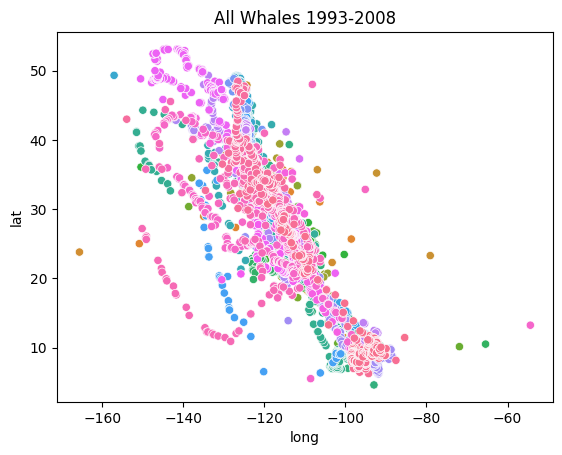

In [6]:
sns.scatterplot(data=whale_small, y="lat", x="long", hue="id", legend=False);
plt.title('All Whales 1993-2008')
plt.savefig('exports/Whales_all_locations.png', bbox_inches='tight')

In [7]:
#define range of lat/long for temperature data:
min_long = np.min(whale_small['long'])
min_lat = np.min(whale_small['lat'])
max_lat = np.max(whale_small['lat'])
max_long = np.max(whale_small['long'])

In [8]:
#Export the data
extent = pd.DataFrame({'Type': ['Lat', 'long'], 'min': [min_lat, min_long],
                   'max': [max_lat, max_long]})
extent.to_csv('./exports/extent.csv')  

In [9]:
whale_small.head()

,time,long,lat,id
0,1993-08-29 01:13:00,-122.433,37.058,1993CA-Bmu-00834
1,1993-08-28 18:20:00,-122.412,37.012,1993CA-Bmu-10823
2,1993-08-28 18:54:00,-122.415,37.022,1993CA-Bmu-10833
3,1993-08-31 23:40:00,-122.773,37.198,1993CA-Bmu-10836
4,1994-09-13 21:28:00,-123.102,37.687,1994CA-Bmu-10820


In [10]:
whale_small.time

0       1993-08-29 01:13:00
1       1993-08-28 18:20:00
2       1993-08-28 18:54:00
3       1993-08-31 23:40:00
4       1994-09-13 21:28:00
                ...        
16244   2008-06-03 19:13:04
16245   2008-06-04 22:27:15
16246   2008-06-11 11:42:10
16247   2008-06-11 11:59:00
16248   2008-06-13 19:08:34
Name: time, Length: 16247, dtype: datetime64[ns]

In [11]:
whales_1999 = whale_small[whale_small['time'].dt.year == 1999]
whales_2008 = whale_small[whale_small['time'].dt.year == 2008]

#Turn into geodataframe:
w1999 = gpd.GeoDataFrame(
    whales_1999, geometry=gpd.points_from_xy(whales_1999.long, whales_1999.lat), crs=4326)

w2008 = gpd.GeoDataFrame(
    whales_2008, geometry=gpd.points_from_xy(whales_2008.long, whales_2008.lat), crs=4326)

In [12]:
#check projections: -----> how is this  meter when its in degrees
w1999.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
#

In [14]:
#look deeper ---> deff in degrees 
w1999.head()

,time,long,lat,id,geometry
36,1999-07-21 18:58:00,-120.080,34.120,1999CA-Bmu-00830,POINT (-120.08000 34.12000)
37,1999-07-23 18:27:00,-120.110,34.120,1999CA-Bmu-00832,POINT (-120.11000 34.12000)
38,1999-07-29 19:29:00,-119.970,34.150,1999CA-Bmu-00834,POINT (-119.97000 34.15000)
39,1999-08-01 16:52:00,-119.910,34.130,1999CA-Bmu-00837,POINT (-119.91000 34.13000)
40,1999-10-02 21:42:00,-120.604,34.135,1999CA-Bmu-00838,POINT (-120.60400 34.13500)


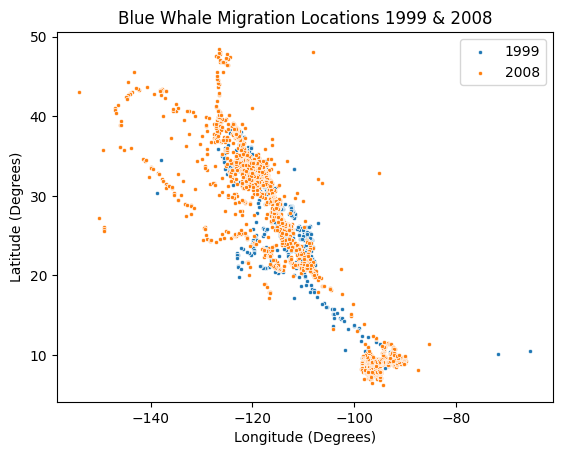

In [15]:
sns.scatterplot(data=w1999, y="lat", x="long", marker='.', label='1999');
sns.scatterplot(data=w2008, y="lat", x="long", marker='.', label='2008');

plt.title('Blue Whale Migration Locations 1999 & 2008')
plt.xlabel('Longitude (Degrees)')
plt.ylabel('Latitude (Degrees)')
plt.savefig('exports/Whales_locations_1999_2008.png', bbox_inches='tight')

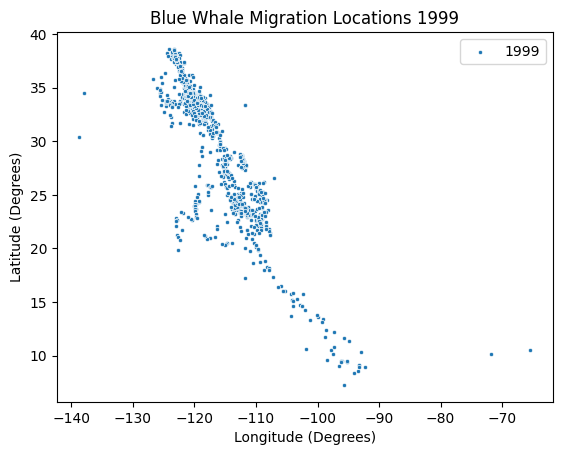

In [16]:
sns.scatterplot(data=w1999, y="lat", x="long", marker='.', label='1999');
plt.title('Blue Whale Migration Locations 1999')
plt.xlabel('Longitude (Degrees)')
plt.ylabel('Latitude (Degrees)')
plt.savefig('exports/Whales_locations_1999.png', bbox_inches='tight')

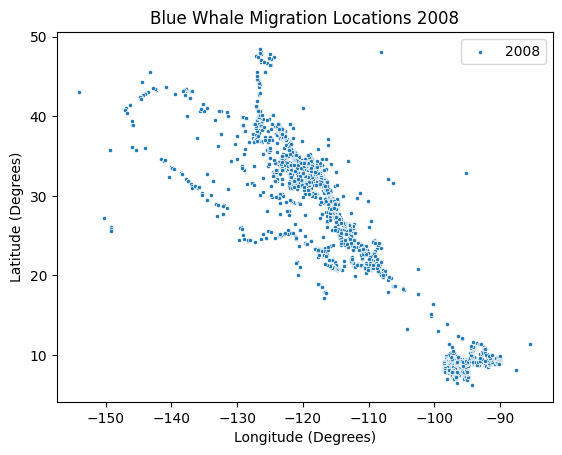

In [17]:
sns.scatterplot(data=w2008, y="lat", x="long", marker='.', label='2008');
plt.title('Blue Whale Migration Locations 2008')
plt.xlabel('Longitude (Degrees)')
plt.ylabel('Latitude (Degrees)')
plt.savefig('exports/Whales_locations_2008.png', bbox_inches='tight')

In [18]:
#project for finding distances
w1999_proj = w1999.to_crs(epsg=3310)
w2008_proj = w2008.to_crs(epsg=3310)

In [19]:
#Make sure all whales are sorted for next step

w1999_proj = w1999_proj.sort_values(['id', 'time'])
w2008_proj = w2008_proj.sort_values(['id', 'time'])

w2008_proj.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [20]:
def calc_dist_from_prev(geodata):
    '''if the id is the same previously, we calculate distance traveled from each point'''
    total_distances = []
    total_distance = 0
    distances_for_gpd = []
    for i in range(len(geodata)):
        row = geodata.iloc[i, :]

        #if first in the table (we cant look at the previous one)
        if i == 0:
            total_distance += 0
            #append 0 for gpd
            distances_for_gpd = np.append(distances_for_gpd, 0)

        #if not first in the table
        else:
            #get the previous row
            prev_row = geodata.iloc[i - 1, :]

            curr_point = Point(row['long'], row['lat'])
            prev_point = Point(prev_row['long'], prev_row['lat'])
            
            #if row id matched previous id:
            if row.id == prev_row.id:
            #calculate distance between points
                distance = row.geometry.distance(prev_row.geometry)
                # distance = curr_point.distance(prev_point)
                total_distance += distance
                #append for gpd
                distances_for_gpd = np.append(distances_for_gpd, distance)
                
            else:
                #append 0 for gpd
                distances_for_gpd = np.append(distances_for_gpd, 0)
                total_distances = np.append(total_distances, total_distance)
                total_distance = 0 
    #for the last point:
    total_distances = np.append(total_distances, total_distance)
    geodata['distances (m)'] = distances_for_gpd
    return total_distances          

In [39]:
distances_1999 = calc_dist_from_prev(w1999_proj)
distances_2008 = calc_dist_from_prev(w2008_proj)
distances_1999_km = calc_dist_from_prev(w1999_proj) / 1000
distances_2008_km = calc_dist_from_prev(w2008_proj) / 1000
mean_dist_1999_km = np.mean(distances_1999) / 1000
mean_dist_2008_km = np.mean(distances_2008)  / 1000
change_km= np.abs(mean_dist_2008-mean_dist_1999)
change_km = change_m / 1_000
change_mi = change_m / 1_609

### Analysis 

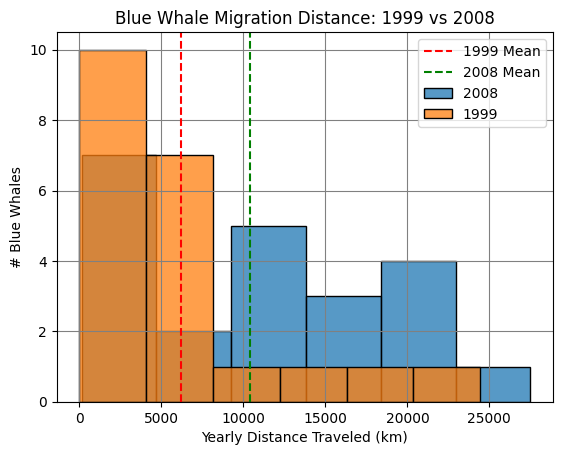

In [68]:
sns.histplot(distances_2008_km, label='2008', bins = 6)
sns.histplot(distances_1999_km, label='1999', bins = 6)
plt.axvline(mean_dist_1999_km, c='red', linestyle='--', label = '1999 Mean')
plt.axvline(mean_dist_2008_km, c='green', linestyle='--', label = '2008 Mean')
plt.legend()
plt.title('Blue Whale Migration Distance: 1999 vs 2008');
plt.xlabel('Yearly Distance Traveled (km)')
plt.ylabel('# Blue Whales')
plt.grid(linestyle='-', color='grey', zorder=0)